# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Importação das bibliotecas e base de dados

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv('/content/Marketing_data.csv')

In [85]:
df.shape

(8950, 18)

In [86]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [88]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [89]:
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [90]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [91]:
df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

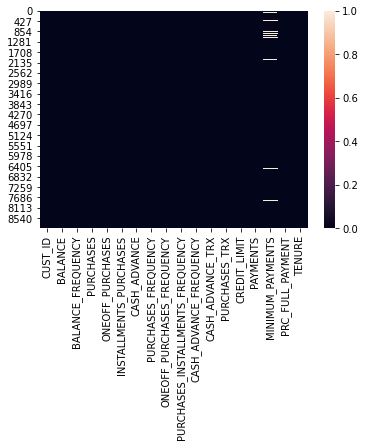

In [92]:
sns.heatmap(df.isnull());

In [93]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [94]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [95]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [96]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [97]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [98]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

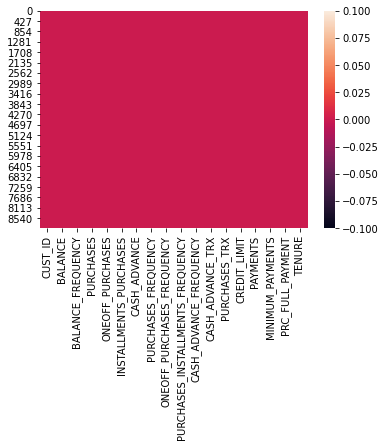

In [99]:
sns.heatmap(df.isnull());

In [100]:
df.duplicated().sum()

0

In [101]:
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [102]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

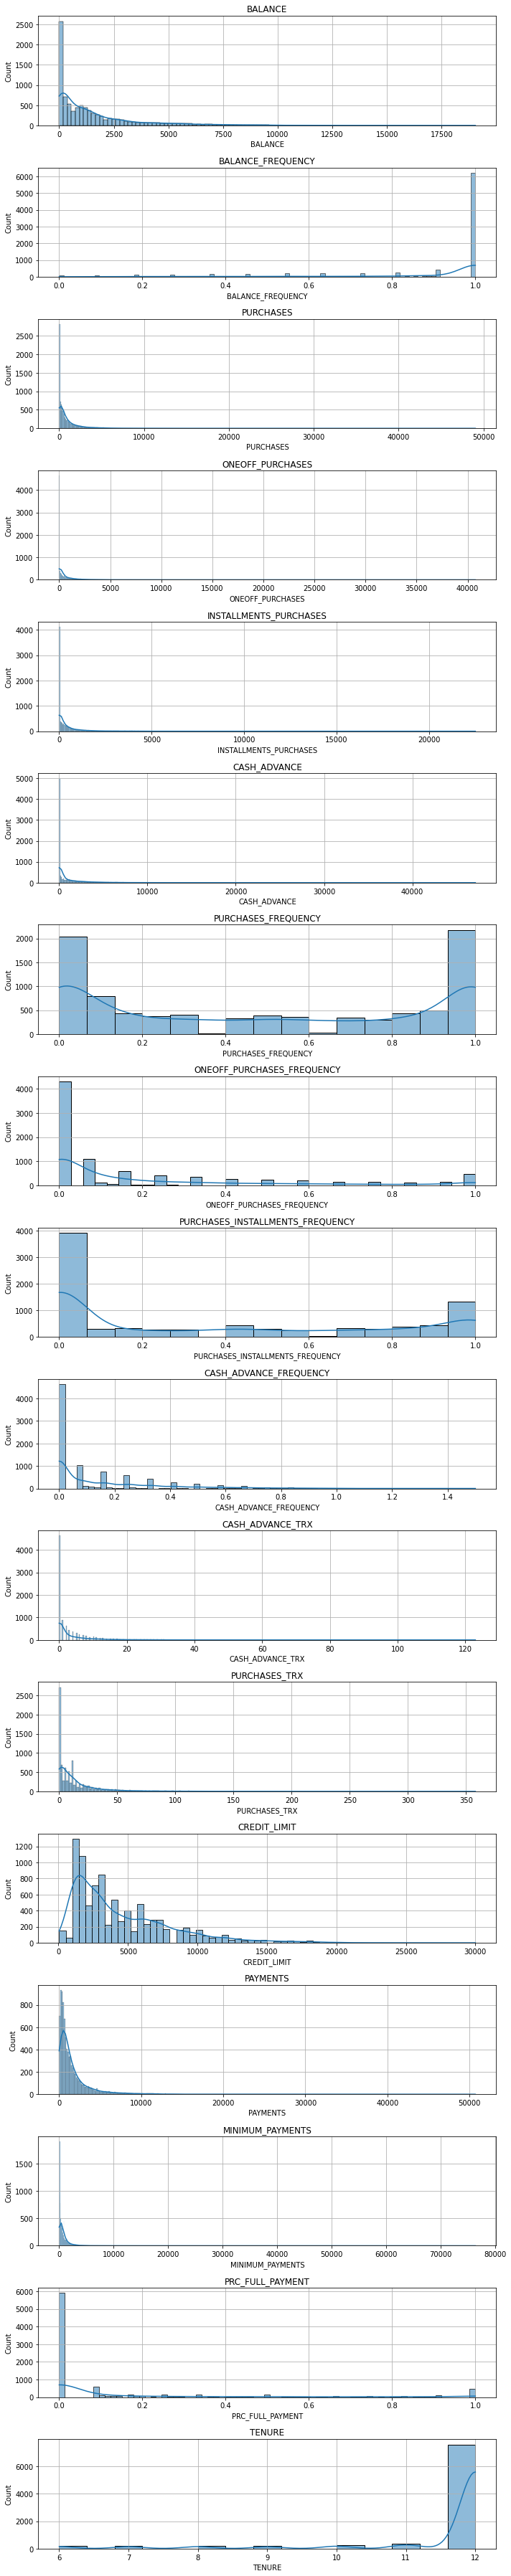

In [103]:
plt.figure(figsize=(10,50))
for i, col in enumerate(df.columns):
  plt.subplot(17, 1, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
  plt.grid()
plt.tight_layout();

In [104]:
correlations = df.corr()

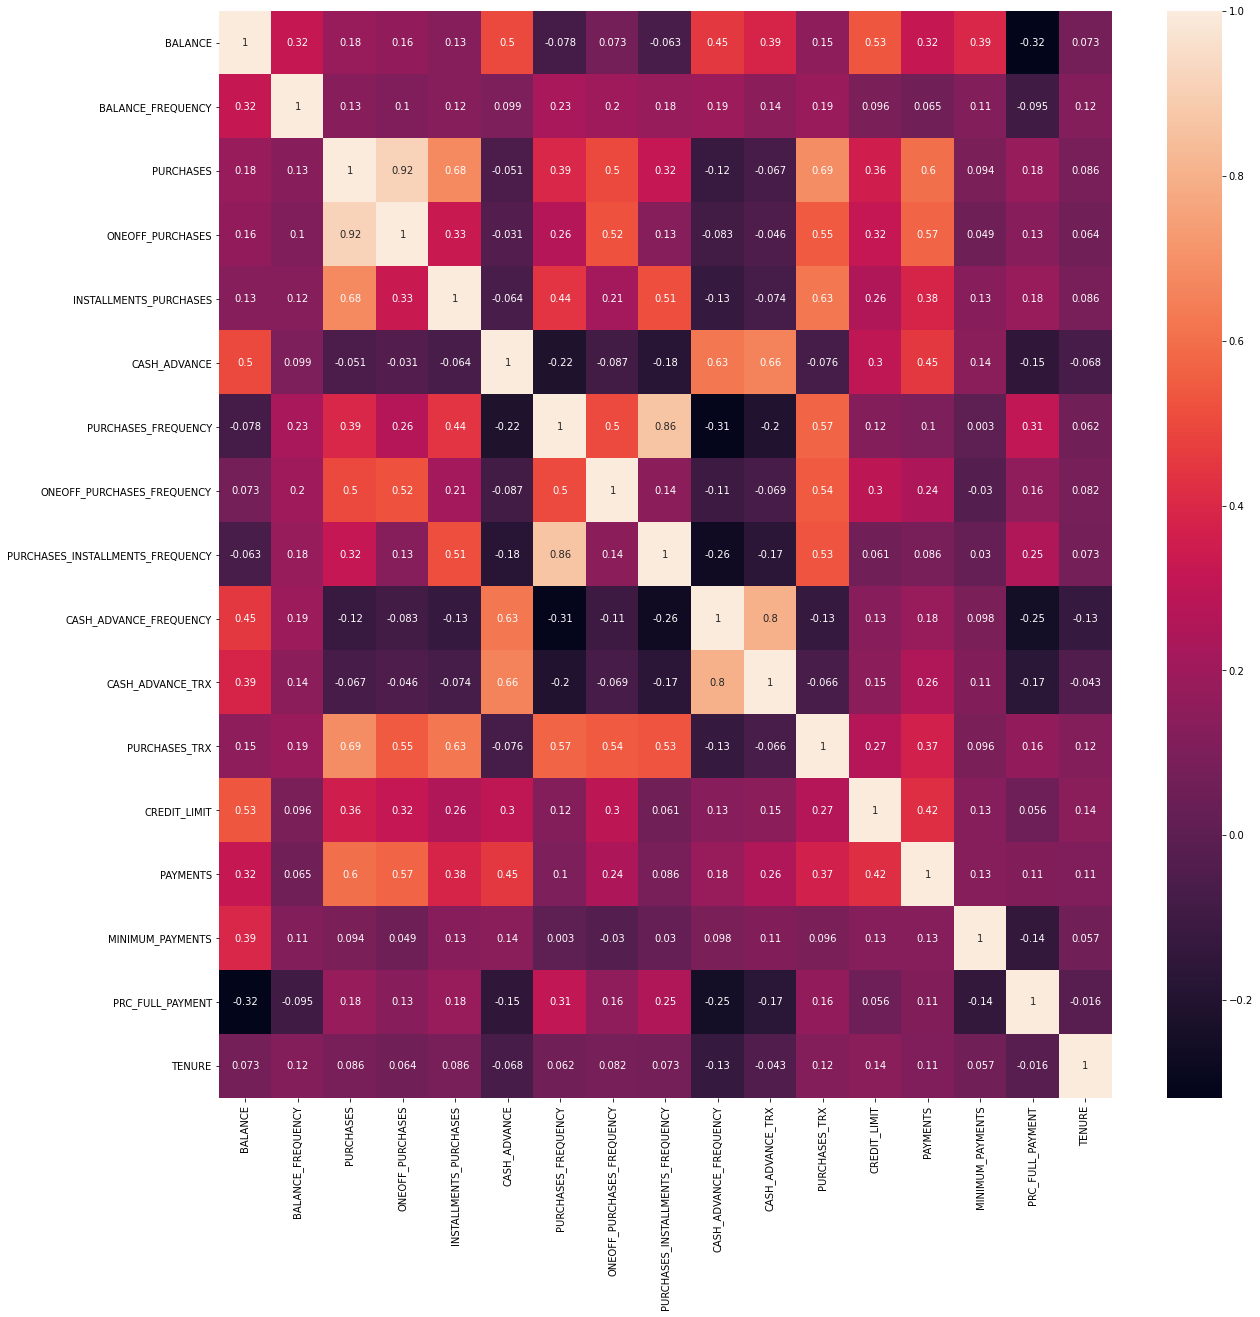

In [105]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [106]:
min(df['BALANCE']), max(df['BALANCE'])

(0.0, 19043.13856)

In [107]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [108]:
min(df_scaled[0]), max(df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [109]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [110]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  wcss_1.append(kmeans.inertia_)

In [111]:
print(wcss_1)

[152150.00000000003, 127784.89277341857, 111986.3963490517, 99073.93826774822, 91503.39081843373, 84851.13240432598, 79881.63585295646, 74624.66060014768, 69954.73945587418, 66461.9797667245, 63633.146040368185, 61395.07165879357, 59141.88805708126, 57499.747090277444, 55862.50529998562, 54281.18303401686, 53338.993696755155, 52043.390315283104, 50907.63973463011]


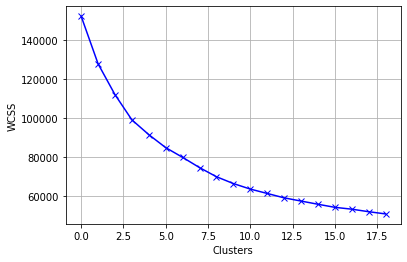

In [112]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid();

Agrupamento com k-means

In [113]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [114]:
labels, len(labels)

(array([7, 4, 6, ..., 3, 3, 3], dtype=int32), 8950)

In [115]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1181, 2016,  423,  622,  859,   30, 1096, 2723]))

In [116]:
kmeans.cluster_centers_

array([[-7.01236486e-01, -2.14283692e+00, -3.11151527e-01,
        -2.35717940e-01, -3.02542469e-01, -3.22027427e-01,
        -5.56270459e-01, -4.44003981e-01, -4.40133868e-01,
        -5.20974576e-01, -3.76187164e-01, -4.19765282e-01,
        -1.77684955e-01, -2.02285853e-01, -2.56703349e-01,
         2.81130276e-01,  1.99336189e-01],
       [-3.64778062e-01,  3.33613299e-01, -3.73814336e-02,
        -2.44338634e-01,  3.60315673e-01, -3.63588884e-01,
         9.90669183e-01, -3.87078511e-01,  1.20608141e+00,
        -4.75237753e-01, -3.61152513e-01,  1.87665863e-01,
        -2.60924517e-01, -2.16885725e-01, -3.26595444e-02,
         3.13849102e-01,  2.57637357e-01],
       [ 9.01817094e-01,  4.66986488e-01,  2.27096268e+00,
         1.75693590e+00,  2.14191957e+00, -1.95511636e-01,
         1.15862945e+00,  1.58388866e+00,  1.22619838e+00,
        -3.12181377e-01, -2.12097314e-01,  2.78145233e+00,
         1.23894709e+00,  1.29029506e+00,  4.41655026e-01,
         3.04777847e-01,  3.3

In [117]:
df_cluster = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df.columns])
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701236,-2.142837,-0.311152,-0.235718,-0.302542,-0.322027,-0.556270,-0.444004,-0.440134,-0.520975,-0.376187,-0.419765,-0.177685,-0.202286,-0.256703,0.281130,0.199336
1,-0.364778,0.333613,-0.037381,-0.244339,0.360316,-0.363589,0.990669,-0.387079,1.206081,-0.475238,-0.361153,0.187666,-0.260925,-0.216886,-0.032660,0.313849,0.257637
2,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
3,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
4,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341


In [118]:
df_cluster = scaler.inverse_transform(df_cluster)
df_cluster = pd.DataFrame(data = df_cluster, columns=[df.columns])
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.910273,0.369652,338.424801,201.193870,137.482244,303.564554,0.267092,0.070003,0.189517,0.030892,0.681626,4.276037,3847.958886,1147.546130,265.970216,0.235940,11.784081
1,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103
2,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
3,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
4,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
7,1605.605016,0.972864,230.086948,182.507000,47.761689,797.516068,0.142079,0.079870,0.062945,0.158341,3.108704,2.607418,3384.930836,1014.967560,844.861335,0.020178,11.881014


In [119]:
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


In [120]:
len(set(labels))

8

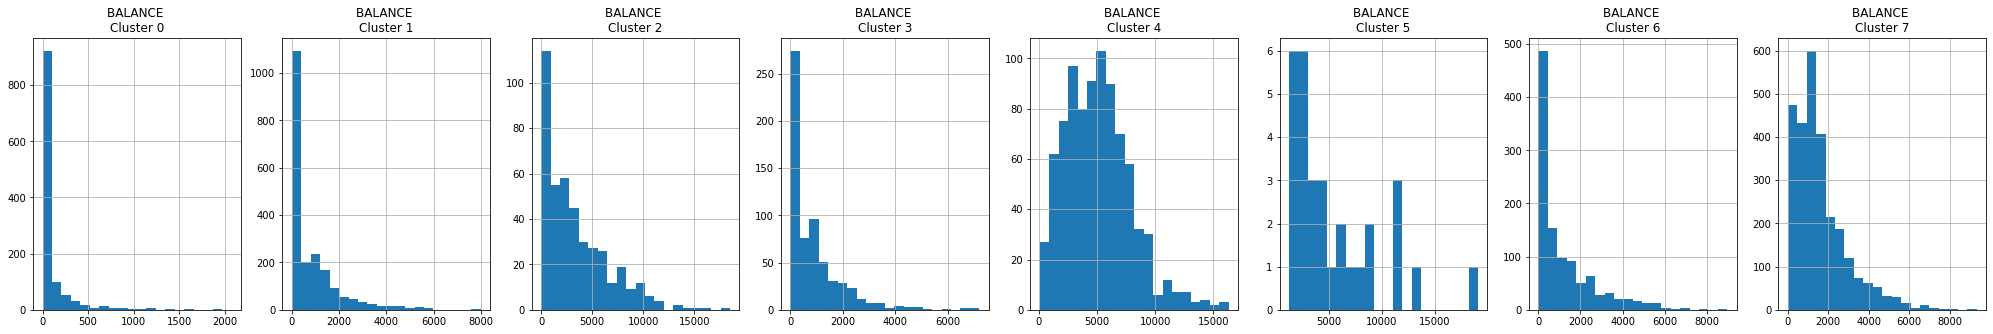

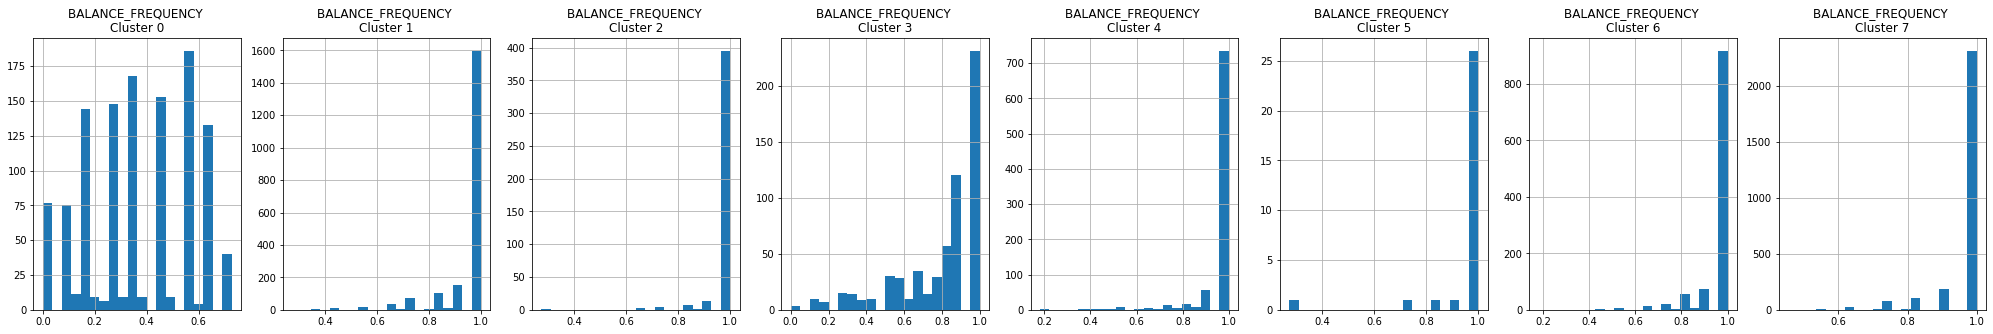

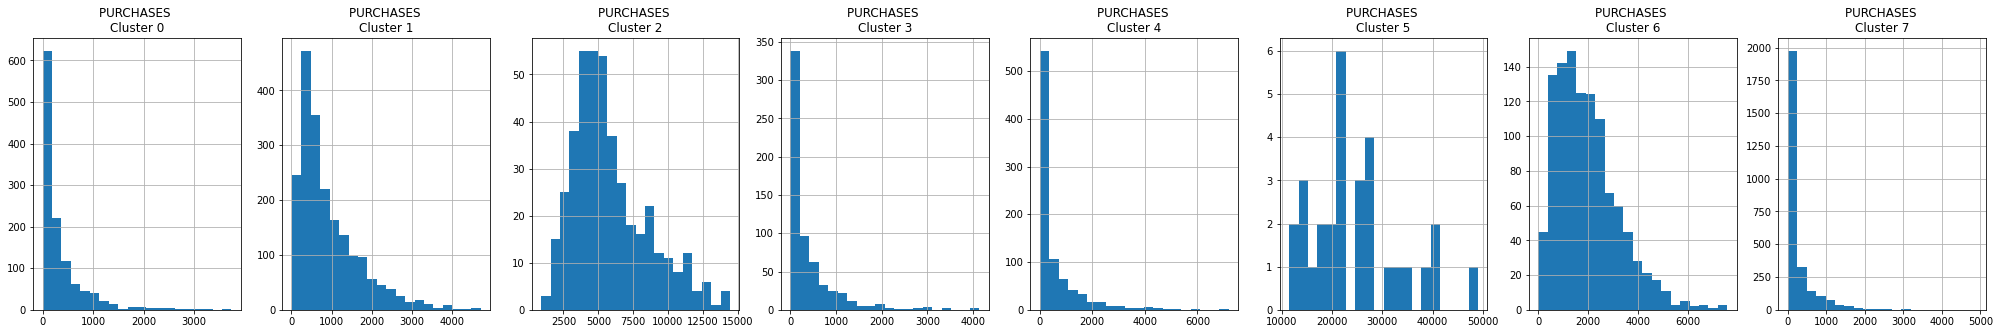

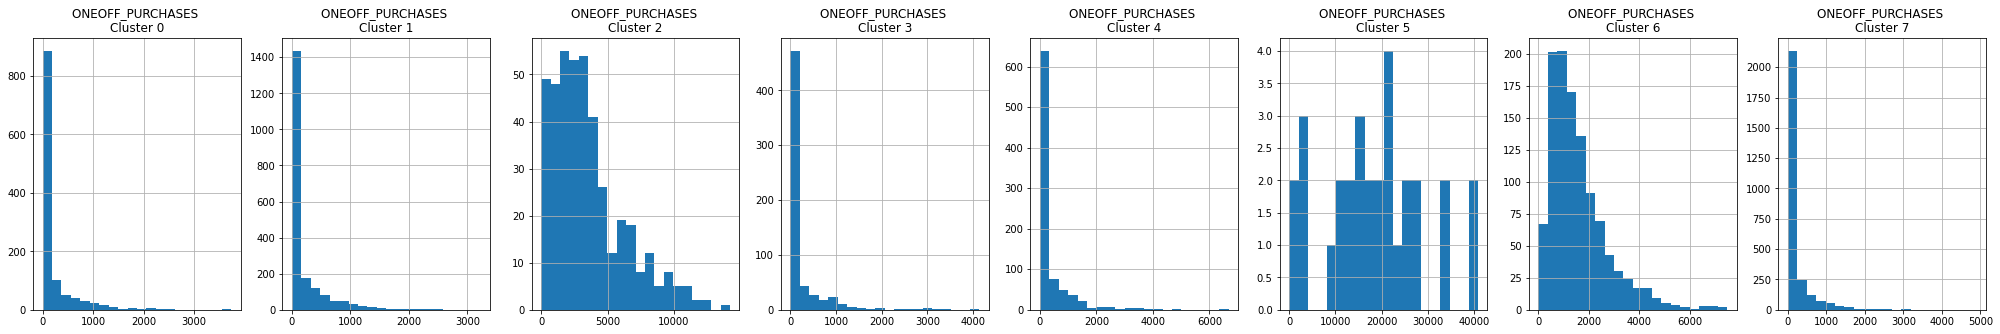

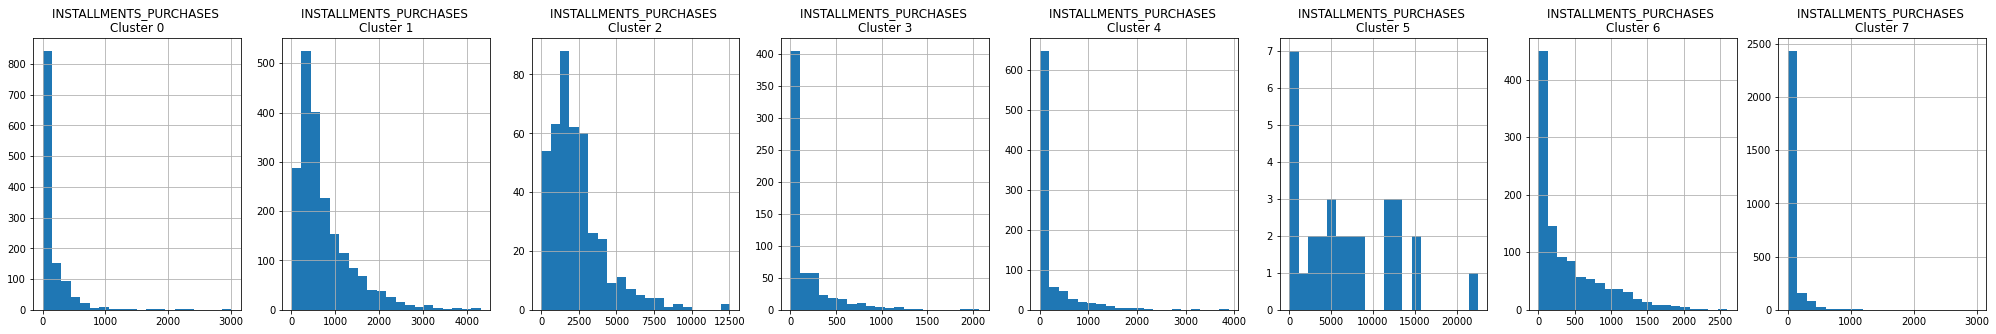

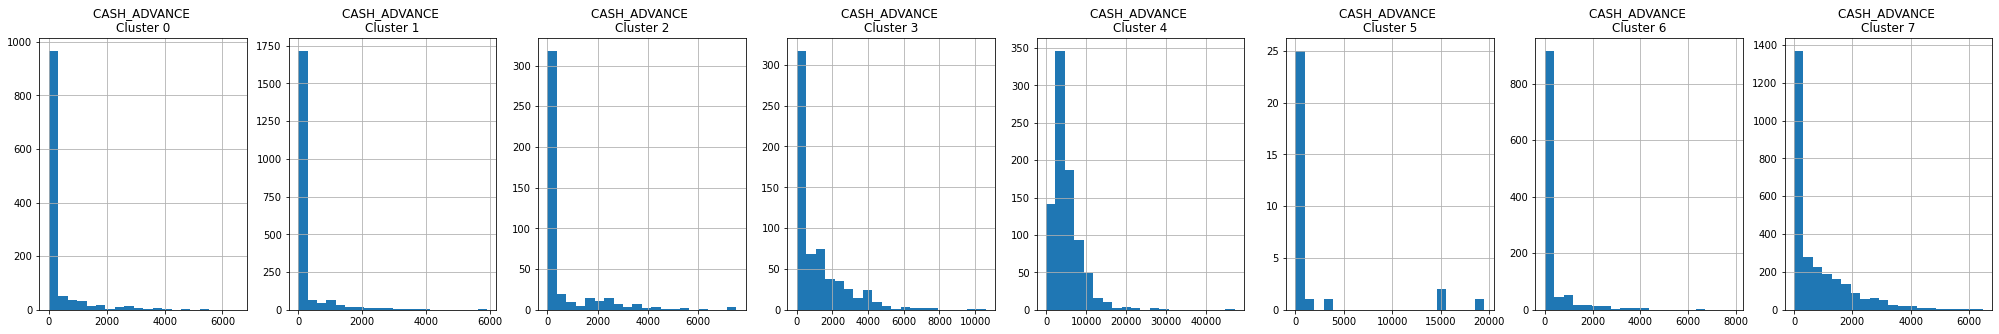

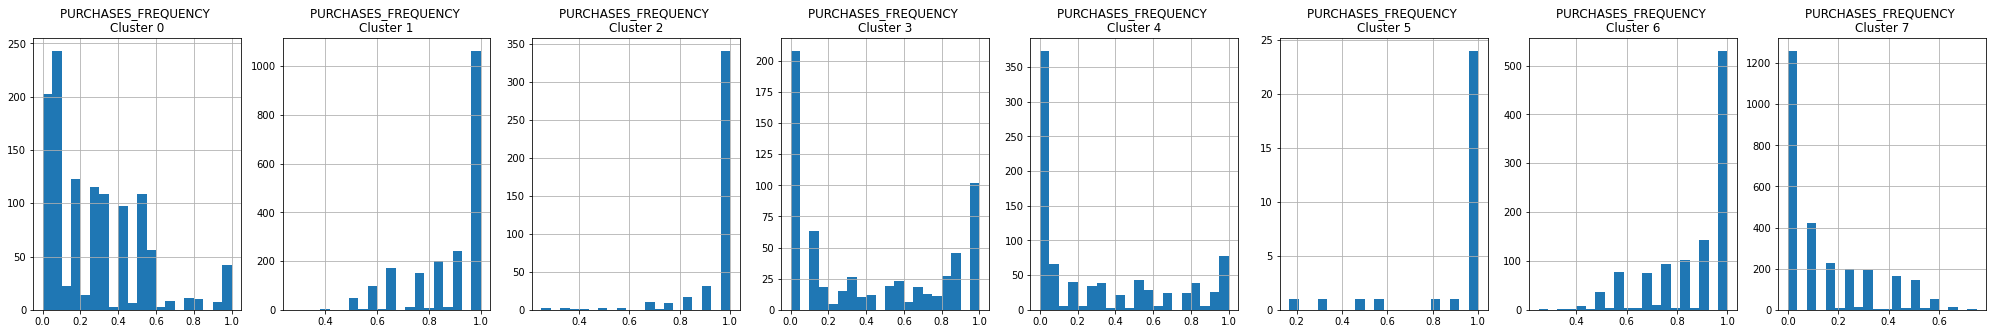

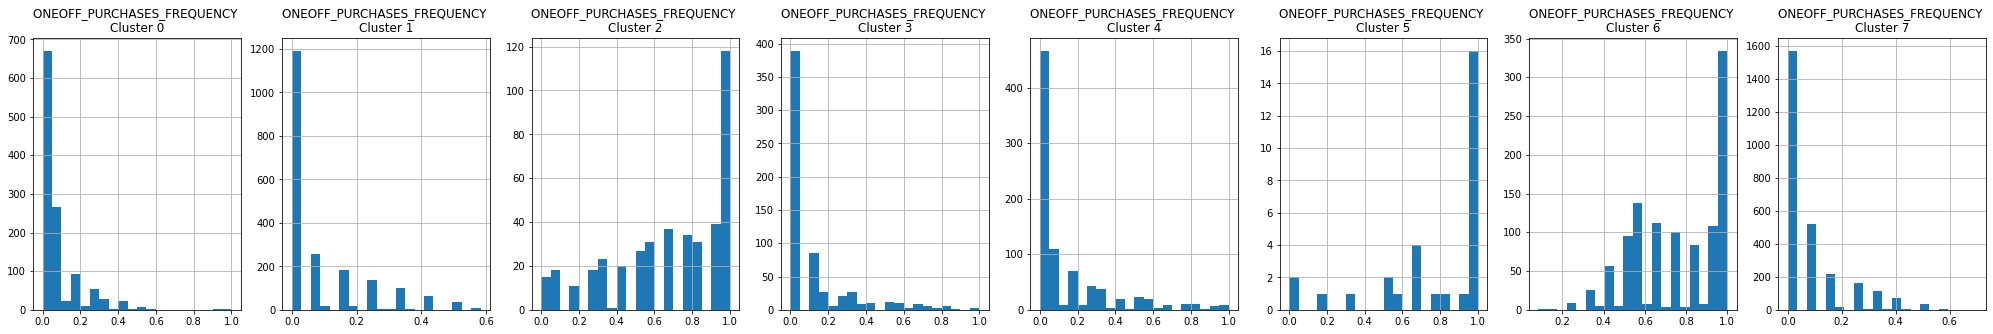

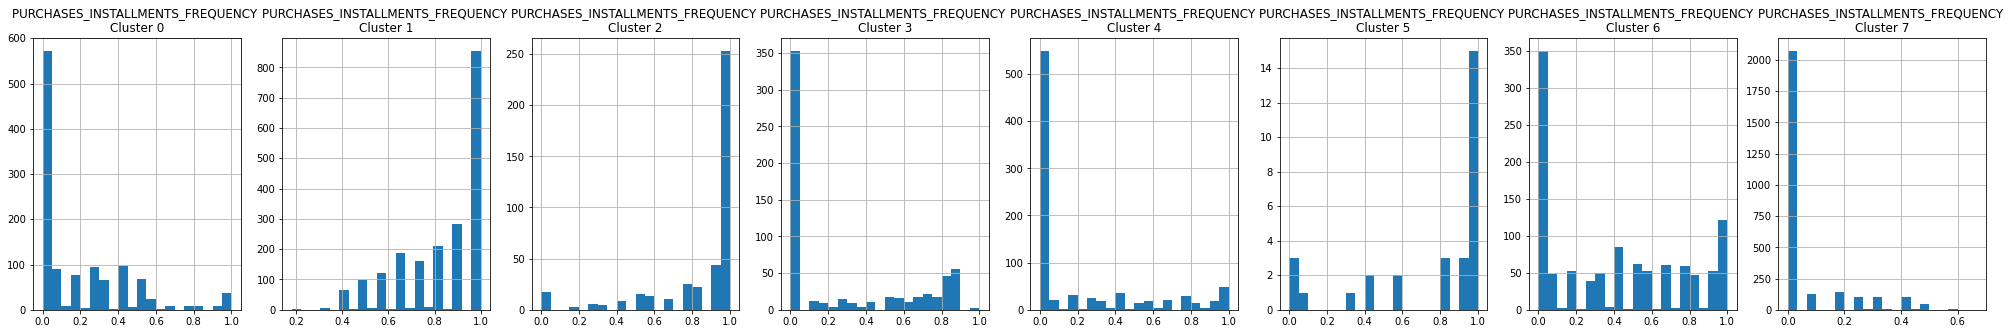

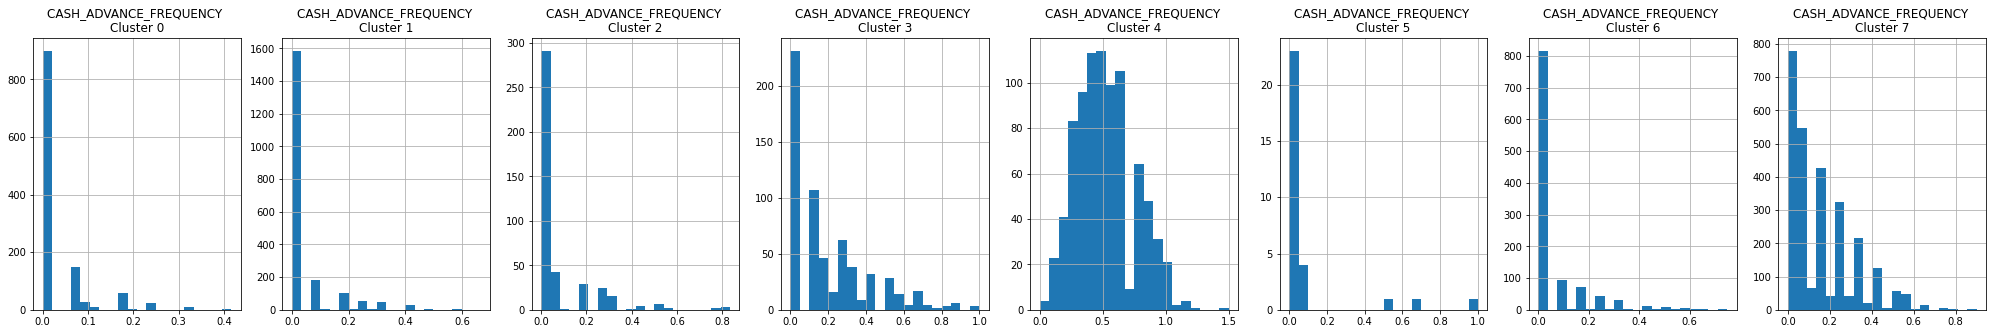

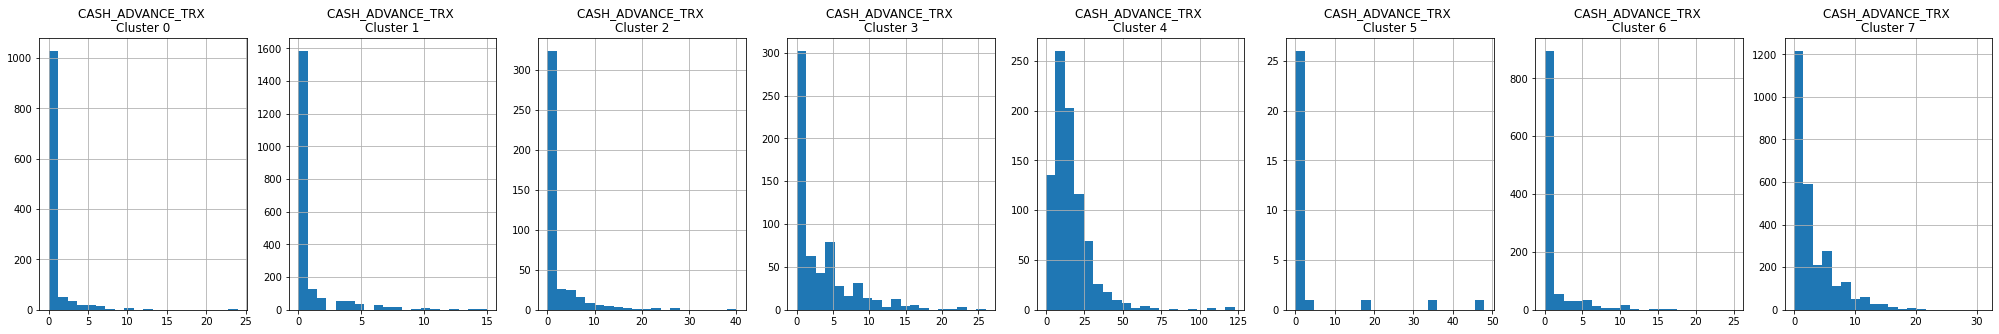

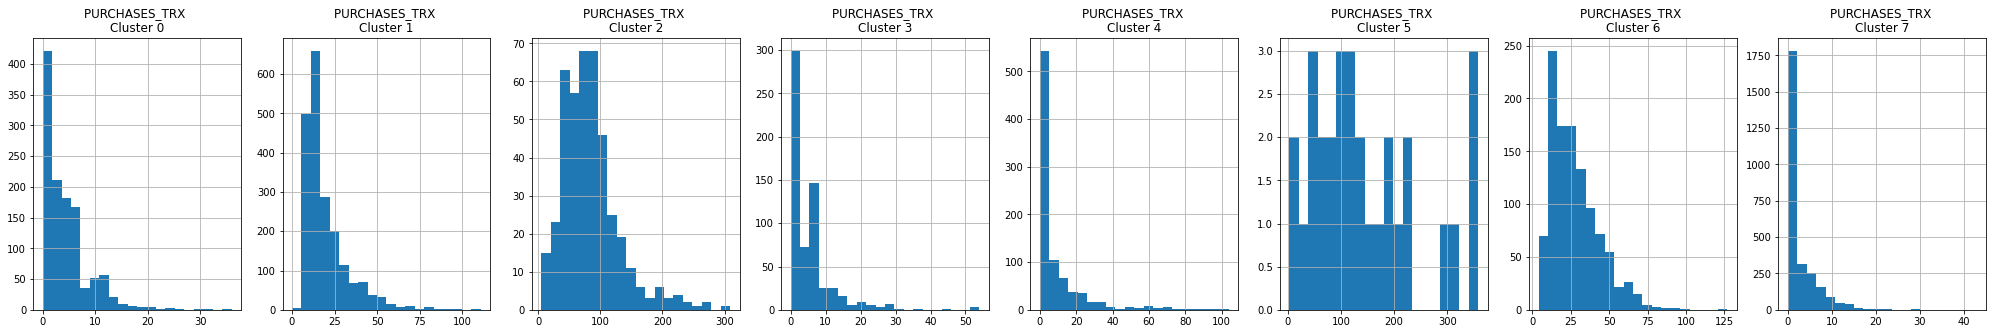

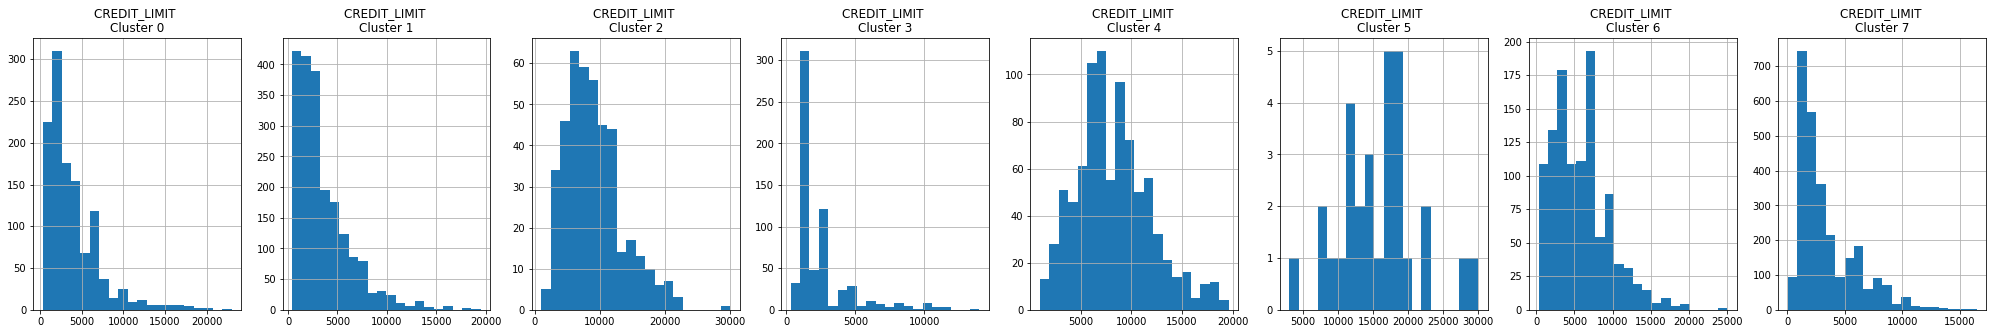

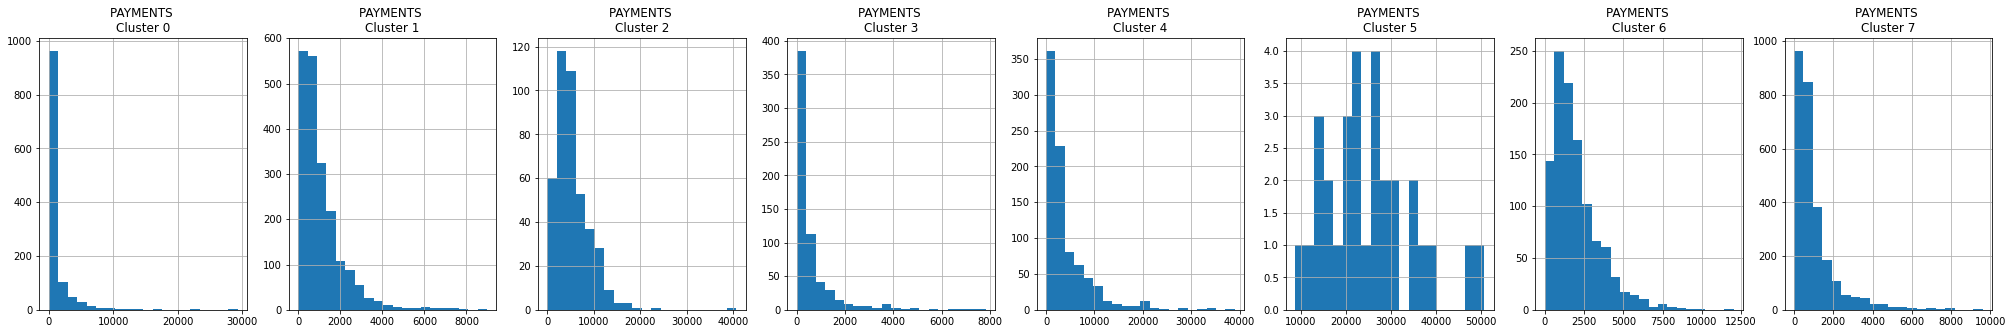

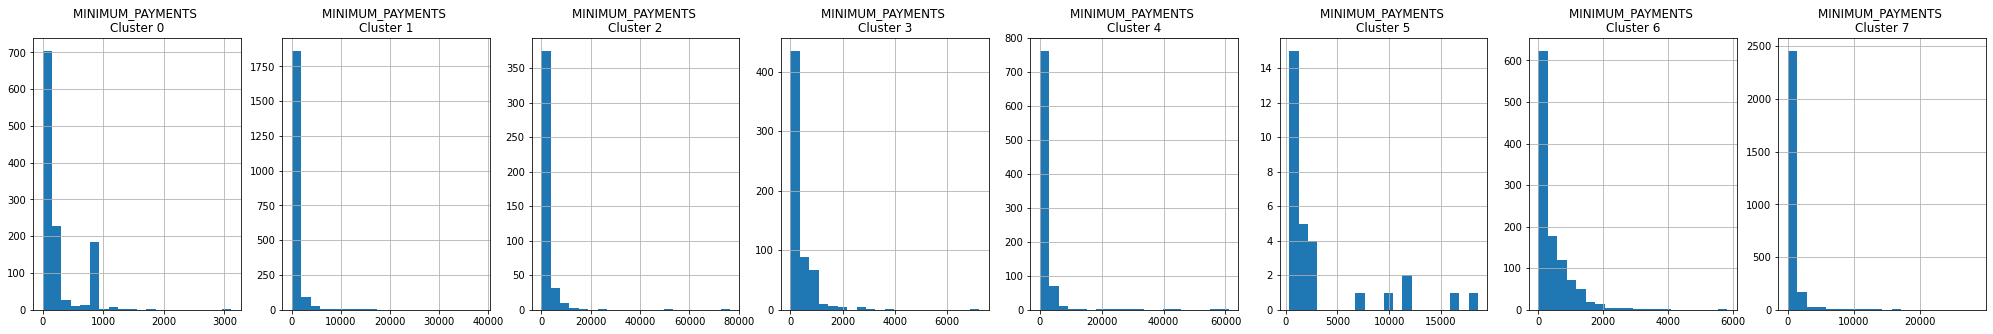

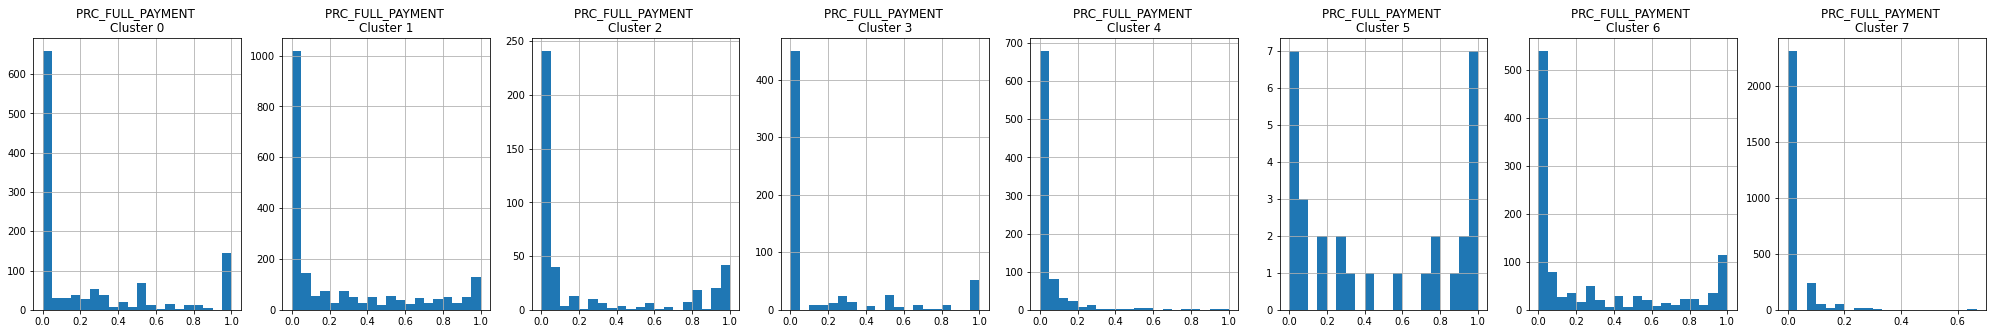

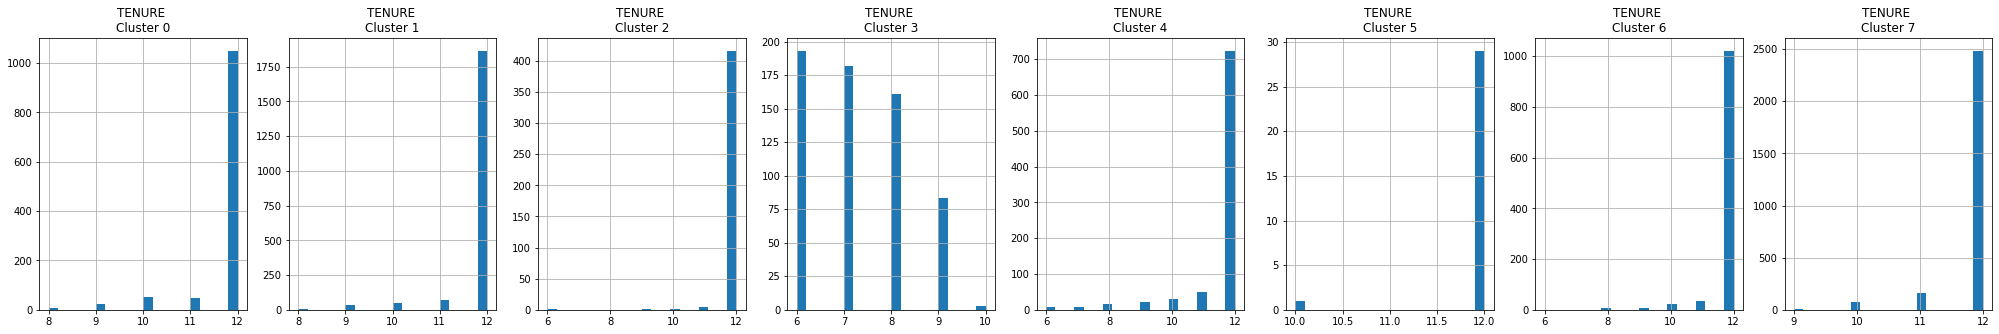

In [121]:
for i, col in enumerate(df.columns):
  plt.figure(figsize=(35,5))
  for j in range(len(set(labels))):
    plt.subplot(1,len(set(labels)), j+1)
    cluster = df_cluster[df_cluster['CLUSTER']==j]
    cluster[col].hist(bins=20)
    plt.title('{} \nCluster {}'.format(col,j))
plt.show()

In [122]:
df_ordered = df_cluster.sort_values(by='CLUSTER')
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
8401,55.597490,0.545455,479.98,479.98,0.00,942.597948,0.090909,0.090909,0.000000,0.090909,1,1,1200.0,1836.626686,31.147044,0.000000,11,0
8104,1.846916,0.181818,604.32,0.00,604.32,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,557.734182,12.224702,0.000000,12,0
4667,8.172299,0.636364,114.00,0.00,114.00,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,2700.0,123.400772,44.254820,0.545455,12,0
5864,3.956222,0.090909,480.01,480.01,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,19500.0,0.000000,864.206542,0.000000,12,0
1228,1.019189,0.090909,87.02,0.00,87.02,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,15500.0,0.000000,864.206542,0.000000,12,0


In [123]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
4647,884.230978,1.0,0.00,0.00,0.00,611.764160,0.000000,0.000000,0.0,0.083333,2,0,1200.0,883.943797,216.195821,0.0,12,7
4650,398.726283,1.0,393.49,393.49,0.00,787.215403,0.166667,0.166667,0.0,0.250000,8,12,600.0,795.860389,213.548011,0.0,12,7
4654,2173.970603,1.0,0.00,0.00,0.00,1192.786167,0.000000,0.000000,0.0,0.250000,4,0,2400.0,445.866028,1043.148468,0.0,12,7
4603,992.615052,1.0,162.28,0.00,162.28,0.000000,0.500000,0.000000,0.5,0.000000,0,6,1000.0,333.663574,462.345834,0.0,12,7
4474,5256.695330,1.0,188.60,188.60,0.00,1934.418697,0.083333,0.083333,0.0,0.333333,4,1,9000.0,1421.954639,1452.249653,0.0,12,7


In [124]:
df_ordered.to_csv('mkt_cluster.csv')

## Aplicação de PCA (Principal Component Analysis) e visualização dos resultados

In [125]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221971, -1.07645186],
       [-1.1382967 ,  2.50647463],
       [ 0.96967967, -0.3835111 ],
       ...,
       [-0.9262018 , -1.81078669],
       [-2.33654863, -0.65796954],
       [-0.55642384, -0.40046371]])

In [126]:
df_pca = pd.DataFrame(data = principal_comp, columns=['PCA1','PCA2'])
df_pca.head()

,PCA1,PCA2
0,-1.682220,-1.076452
1,-1.138297,2.506475
2,0.969680,-0.383511
3,-0.873626,0.043160
4,-1.599433,-0.688580


In [127]:
df_pca = pd.concat([df_pca, pd.DataFrame({'CLUSTER': labels})], axis = 1)
df_pca.head()

,PCA1,PCA2,CLUSTER
0,-1.682220,-1.076452,7
1,-1.138297,2.506475,4
2,0.969680,-0.383511,6
3,-0.873626,0.043160,7
4,-1.599433,-0.688580,7


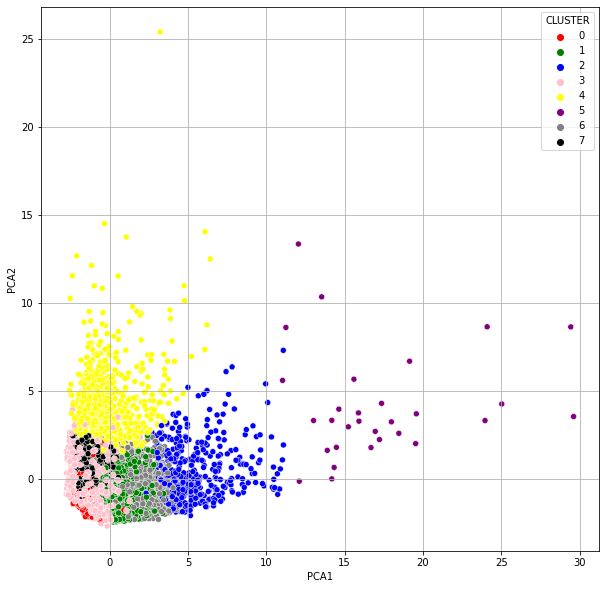

In [134]:
plt.figure(figsize=(10,10))
palette=['red','green','blue','pink','yellow','purple','gray','black']
sns.scatterplot(x='PCA1', y='PCA2', hue='CLUSTER', data=df_pca, palette=palette)
plt.grid();

## Aplicação de autoencoders

In [135]:
df_scaled.shape

(8950, 17)

In [136]:
# 18 -> 10
# Elbow
# K-Means
# PCA
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [137]:
df_input = Input(shape=(17,))
x = Dense(500, activation='relu')(df_input)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [138]:
# Autoencoder
autoencoder = Model(df_input, decoded)

In [139]:
# Encoder
encoder = Model(df_input, encoded)

In [140]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [141]:
autoencoder.fit(df_scaled, df_scaled, epochs=50)

Epoch 1/50
280/280 [==============================] - 8s 25ms/step - loss: 0.3315
Epoch 2/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0670
Epoch 3/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0630
Epoch 4/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0499
Epoch 5/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0315
Epoch 6/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0230
Epoch 7/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0488
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0460
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0469
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0287
Epoch 11/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0272
Epoch 12/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0190
Epoch 13/50
2

In [142]:
df_scaled.shape

(8950, 17)

In [143]:
compact = encoder.predict(df_scaled)
compact.shape

(8950, 10)

In [144]:
df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [145]:
compact[0]

array([1.2446771 , 0.26698437, 1.3030366 , 0.81413937, 0.01075292,
       0.20092836, 0.22619523, 0.28533024, 0.64181596, 0.        ],
      dtype=float32)

In [146]:
wcss_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

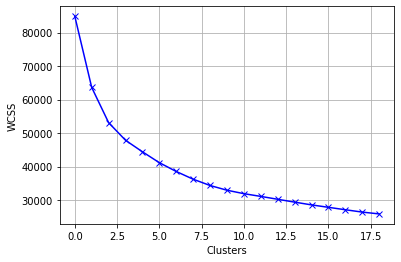

In [147]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid();

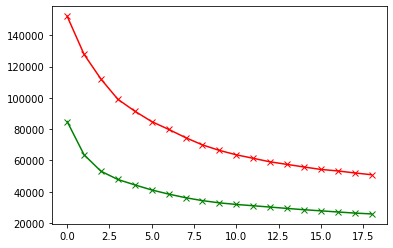

In [148]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g');

In [150]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [151]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 3, 2, ..., 1, 1, 1], dtype=int32), (8950,))

In [152]:
df_cluster_at = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [153]:
pca = PCA(n_components=2)
prin_comp_at = pca.fit_transform(compact)
df_pca_at = pd.DataFrame(data=prin_comp_at, columns=['PCA1','PCA2'])
df_pca_at.head()

,PCA1,PCA2
0,-1.271470,0.109015
1,1.581293,-1.421979
2,-0.622765,0.270466
3,0.473376,-0.154260
4,-1.516356,-0.009697


In [154]:
df_pca_at = pd.concat([df_pca_at, pd.DataFrame({'CLUSTER':labels})], axis=1)
df_pca_at.head()

,PCA1,PCA2,CLUSTER
0,-1.271470,0.109015,2
1,1.581293,-1.421979,3
2,-0.622765,0.270466,2
3,0.473376,-0.154260,1
4,-1.516356,-0.009697,2


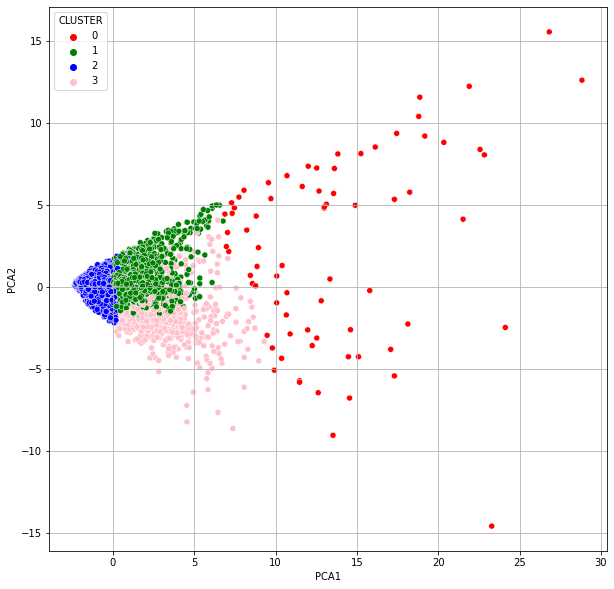

In [155]:
plt.figure(figsize=(10,10))
palette=['red','green','blue','pink']
sns.scatterplot(x='PCA1', y='PCA2', hue='CLUSTER', data=df_pca_at, palette=palette)
plt.grid();

In [156]:
df_ordered_at = df_cluster_at.sort_values(by='CLUSTER')
df_ordered_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
6455,9110.968989,1.0,1490.75,1490.75,0.00,20277.33112,0.166667,0.166667,0.000000,0.333333,22,5,11000.0,19740.74802,2684.226743,0.000000,12,0
1991,1513.075264,1.0,15704.04,12618.86,3085.18,0.00000,1.000000,0.916667,0.916667,0.000000,0,185,3000.0,14399.70318,310.712671,0.916667,12,0
501,13479.288210,1.0,41050.40,40624.06,426.34,0.00000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,0
2970,5968.583246,1.0,22381.97,19150.02,3231.95,0.00000,1.000000,1.000000,0.583333,0.000000,0,87,14500.0,20343.28681,1966.191831,0.000000,12,0
138,19043.138560,1.0,22009.92,9449.07,12560.85,0.00000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12,0


In [157]:
df_cluster_at.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,1
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,1


In [158]:
df_ordered_at.to_excel('mkt_ordered_at.xls')